In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df_house = pd.read_csv(".\data_zillow_house_prices.csv")
df_rates = pd.read_csv(".\data_interest_rates.csv")
boston_arr = (df_house[df_house["RegionName"] == "Boston, MA"]).squeeze()
boston_arr = boston_arr.iloc[6:]
boston_arr.index = pd.to_datetime(boston_arr.index)
train = boston_arr["2010-01-01":"2017-12-31"]
train = train.astype(float)
train.name = "Y"
train

2010-01-31    352001.0
2010-02-28    353713.0
2010-03-31    354899.0
2010-04-30    356066.0
2010-05-31    356716.0
                ...   
2017-08-31    452393.0
2017-09-30    454372.0
2017-10-31    455955.0
2017-11-30    459183.0
2017-12-31    461409.0
Name: Y, Length: 96, dtype: float64

In [36]:
test = boston_arr["2018-01-01":"2019-12-31"]
test

2018-01-31    464123.0
2018-02-28    466719.0
2018-03-31    470227.0
2018-04-30    472858.0
2018-05-31    475336.0
2018-06-30    477316.0
2018-07-31    478886.0
2018-08-31    480190.0
2018-09-30    480991.0
2018-10-31    482472.0
2018-11-30    483526.0
2018-12-31    484936.0
2019-01-31    486288.0
2019-02-28    487146.0
2019-03-31    486783.0
2019-04-30    485946.0
2019-05-31    485379.0
2019-06-30    485838.0
2019-07-31    485973.0
2019-08-31    486692.0
2019-09-30    488060.0
2019-10-31    489468.0
2019-11-30    490736.0
2019-12-31    492230.0
Name: 11, dtype: object

Detrended Time Series:
2010-01-31    30218.510095
2010-02-28    30661.472601
2010-03-31    30578.435108
2010-04-30    30476.397615
2010-05-31    29857.360122
                  ...     
2017-08-31    15128.098212
2017-09-30    15838.060718
2017-10-31    16152.023225
2017-11-30    18110.985732
2017-12-31    19067.948239
Name: Y, Length: 96, dtype: float64


<Axes: >

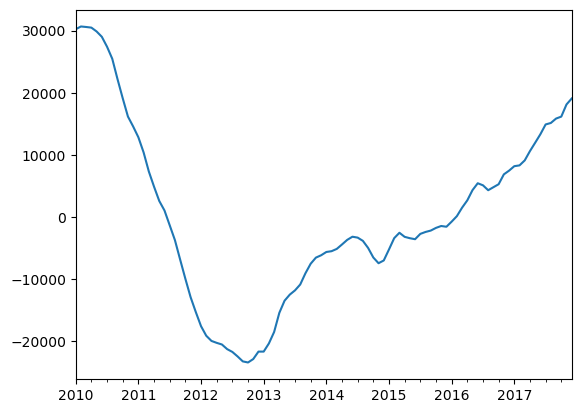

In [37]:
n = len(train)
t = np.arange(n)

mean_t = np.mean(t)
mean_Y = np.mean(train)

b_numerator = np.sum((t - mean_t) * (train - mean_Y))
b_denominator = np.sum((t - mean_t) ** 2)
b = b_numerator / b_denominator
a = mean_Y - b * mean_t

trend = a + b * t
Y_detrended = train - trend

# Output the detrended series
print("Detrended Time Series:")
print(Y_detrended)
Y_detrended.plot()

In [38]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(Y_detrended, order=[2, 0, 0]).fit()
model.summary()

c:\Users\Atakan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Atakan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Atakan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                   96
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -764.359
Date:                Sat, 26 Oct 2024   AIC                           1536.718
Time:                        14:55:17   BIC                           1546.976
Sample:                    01-31-2010   HQIC                          1540.864
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2258   7637.382   2.96e-05      1.000    -1.5e+04     1.5e+04
ar.L1          1.8877      0.047     40.024      0.000       1.795       1.980
ar.L2         -0.8956      0.046    -19.292      0.000      -0.987      -0.805
sigma2      4.436e+05   6.98e+04      6.355      0.000    3.07e+05     5.8e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.77   Prob(JB):                         0.59
Heteroskedasticity (H):               1.49   Skew:                             0.23
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

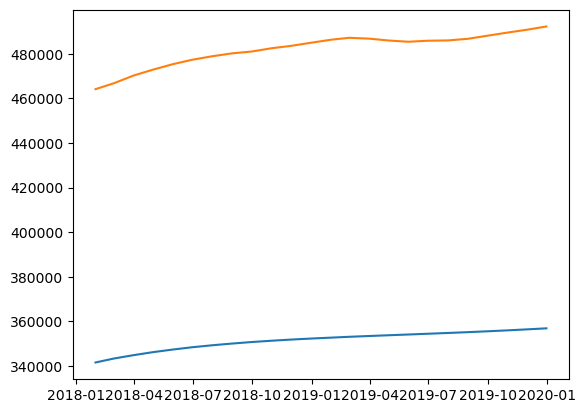

In [41]:
n_test = len(test)
t_test = np.arange(len(test))
test_fc = model.forecast(n_test) + (a + b*t_test)
plt.plot(test_fc)
plt.plot(test)